## 60
>単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

- gensim
    https://pypi.org/project/gensim/
    > Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community.

In [2]:
import gensim
# Google Driveをマウント
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61
> “United States”と”U.S.”のコサイン類似度を計算せよ．

- Cosine similarity
https://www.cse.kyoto-su.ac.jp/~g0846020/keywords/cosinSimilarity.html

$\cos (\vec{q}, \vec{d})=\frac{\vec{q} \cdot \vec{d}}{|\vec{q}| \vec{d} \mid}=\frac{\vec{q}}{|\vec{q}|} \cdot \frac{\vec{d}}{|\bar{d}|}=\frac{\sum_{i=1}^{|V|} q_{i} d_{i}}{\sqrt{\sum_{i=1}^{V \mid} q_{i}^{2}} \cdot \sqrt{\sum_{i=1}^{|V|} d_{i}^{2}}}$

In [10]:
q=model['United_States']
d=model['U.S.']
denominator=sum([q[i]*d[i] for i in range(300)])
numerator_q=sum([q[i]**2 for i in range(300)])**0.5
numerator_d=sum([d[i]**2 for i in range(300)])**0.5
sim=denominator/(numerator_q*numerator_d)
print(sim)

0.7310774298319469


In [11]:
#gensimのAPIを使う
model.similarity('United_States','U.S.')

0.73107743

## 62
> “United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

- `most_similar` Doc
https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

In [3]:
model.most_similar('United_States',topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63
> “Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ

- `most_similar` Doc
https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

In [4]:
model.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64
> 単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [5]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2021-06-14 14:41:18--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.69.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2021-06-14 14:41:19 (194 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [26]:
from tqdm import tqdm
with open('./questions-words.txt', 'r') as f1, open('./ans2', 'w') as f2:
  for line in tqdm(f1):  # f1から1行ずつ読込み、求めた単語と類似度を追加してf2に書込む
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

ストリーミング出力は最後の 5000 行に切り捨てられました。
14556it [1:40:28,  2.38it/s]
14557it [1:40:28,  2.40it/s]
14558it [1:40:29,  2.40it/s]
14559it [1:40:29,  2.39it/s]
14560it [1:40:29,  2.46it/s]
14561it [1:40:30,  2.51it/s]
14562it [1:40:30,  2.48it/s]
14563it [1:40:31,  2.49it/s]
14564it [1:40:31,  2.48it/s]
14565it [1:40:31,  2.45it/s]
14566it [1:40:32,  2.43it/s]
14567it [1:40:32,  2.47it/s]
14568it [1:40:33,  2.39it/s]
14569it [1:40:33,  2.45it/s]
14570it [1:40:34,  2.41it/s]
14571it [1:40:34,  2.39it/s]
14572it [1:40:34,  2.36it/s]
14573it [1:40:35,  2.36it/s]
14574it [1:40:35,  2.33it/s]
14575it [1:40:36,  2.33it/s]
14576it [1:40:36,  2.37it/s]
14577it [1:40:37,  2.40it/s]
14578it [1:40:37,  2.43it/s]
14579it [1:40:37,  2.41it/s]
14580it [1:40:38,  2.41it/s]
14581it [1:40:38,  2.40it/s]
14582it [1:40:39,  2.44it/s]
14583it [1:40:39,  2.41it/s]
14584it [1:40:39,  2.42it/s]
14585it [1:40:40,  2.44it/s]
14586it [1:40:40,  2.44it/s]
14587it [1:40:41,  2.47it/s]
14588it [1:40:41,  2.41it/s]
14589it [1:

## 65
> 64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

*アナロジーとは？https://tomowarkar.github.io/blog/posts/nlp100-07/
> カテゴリ名にgramが含まれるものを文法的アナロジー, そうでないものを意味的アナロジーとします。


In [28]:
with open('./ans2', 'r') as f:
  sem_cnt = 0
  sem_cor = 0
  syn_cnt = 0
  syn_cor = 0
  for line in f:
    line = line.split()
    #gramが含まれるか
    if not line[0].startswith('gram'):
      sem_cnt += 1
    #カテゴリの一致
      if line[4] == line[5]:
        sem_cor += 1
    else:
      syn_cnt += 1
    #カテゴリの一致
      if line[4] == line[5]:
        syn_cor += 1

print("意味的アナロジー正解率:",sem_cor/sem_cnt)
print("文法的アナロジー正解率:",syn_cor/syn_cnt) 

意味的アナロジー正解率: 0.7308602999210734
文法的アナロジー正解率: 0.7400468384074942


## 66
> The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．


$\rho=\frac{\operatorname{cov}(X, Y)}{\sigma_{X} \sigma_{Y}}=\frac{E[(X-E[X])(Y-E[Y])]}{\sqrt{E\left[(X-E[X])^{2}\right]} \sqrt{E\left[(Y-E[Y])^{2}\right]}}$

- The WordSimilarity-353 Test Collection
単語のペアに対して人間が評価した類似度が付与されたデータ

In [12]:
!curl -s http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip -o wordsim353.zip
!unzip wordsim353.zip

Archive:  wordsim353.zip
replace combined.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: combined.csv            
replace set1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: set1.csv                
replace set2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: set2.csv                
replace combined.tab? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace combined.tab? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: combined.tab            
replace set1.tab? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: set1.tab                
replace set2.tab? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: set2.tab                
replace instructions.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: instructions.txt        


In [54]:
import pandas as pd
df = pd.read_csv('combined.csv')
sim = []
for i in range(len(df)):
    line = df.iloc[i]
    sim.append(model.similarity(line['Word 1'],line['Word 2']))
df['w2v'] = sim 
df[['Human (mean)', 'w2v']].corr(method='spearman')

,Human (mean),w2v
Human (mean),1.000000,0.700017
w2v,0.700017,1.000000


## 67
> 国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ

- sklearnのk-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- k-meansとは https://qiita.com/g-k/items/0d5d22a12a4507ecbf11
 >   1. 各点に対してランダムにk個のクラスタを割り振る
    2. 各クラスタに割り当てられた点について重心を計算する
    3. 各点について上記で計算された重心からの距離を計算し、距離が一番近いクラスタに割り当て直す。
    4. 2.と3.の工程を、割り当てられるクラスタが変化しなくなるまで行う

In [51]:
# 国名の取得
countries = set()
with open('./ans2') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]
from sklearn.cluster import KMeans

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Italy, Norway, England, Brazil, Argentina, Iceland, Liechtenstein, USA, Portugal, Japan, Canada, Netherlands, Switzerland, Austria, Germany, Denmark, France, Greenland, Finland, Uruguay, Ireland, Spain, Europe, Sweden, Australia, Belgium
cluster 1
Zambia, Sudan, Zimbabwe, Angola, Algeria, Libya, Liberia, Botswana, Somalia, Burundi, Morocco, Guinea, Mali, Tunisia, Gambia, Mauritania, Ghana, Rwanda, Kenya, Gabon, Malawi, Senegal, Uganda, Eritrea, Mozambique, Niger, Namibia, Madagascar, Nigeria
cluster 2
Slovakia, Belarus, Turkmenistan, Cyprus, Georgia, Albania, Lithuania, Azerbaijan, Kazakhstan, Slovenia, Latvia, Estonia, Uzbekistan, Romania, Poland, Macedonia, Kyrgyzstan, Russia, Malta, Greece, Moldova, Croatia, Armenia, Hungary, Serbia, Montenegro, Turkey, Ukraine, Bulgaria
cluster 3
Vietnam, Malaysia, Thailand, Lebanon, Iran, Laos, Philippines, Iraq, Bahrain, Taiwan, Bangladesh, Afghanistan, Bhutan, Korea, Qatar, Jordan, Egypt, Indonesia, Tajikistan, Oman, China, Nepal, Indi

## 68
> 国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

- ウォード法
https://www.albert2005.co.jp/knowledge/data_mining/cluster/hierarchical_clustering

1. 最も近い二組をくくる
2. 1の重心から最も近い、1以外の二組をくくる
3.  1,2の二つの重心から最も近い二組を括る
4. ...

→二分木の完成

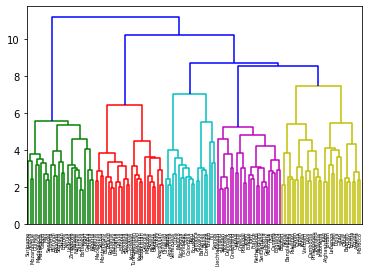

In [33]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 国名の取得
countries = set()
with open('./ans2') as f:
  for line in f:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトルの取得
countries_vec = [model[country] for country in countries]


Z = linkage(countries_vec, method='ward')
dendrogram(Z, labels=countries)#階層構造をセット
plt.show()

## 69
> ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

- t-SNE($\mathbf{t-distributed}　\mathbf{Stochastic} 　\mathbf{Neighbor}　\mathbf{Embedding}$) https://qiita.com/g-k/items/120f1cf85ff2ceae4aba

高次元空間を2,3次元空間に圧縮する手法

面白いページ->https://distill.pub/2016/misread-tsne/

-

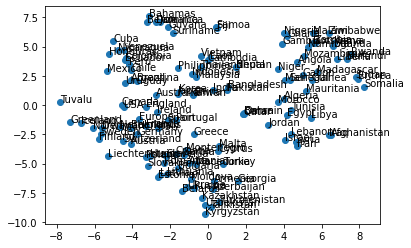

In [34]:
!pip install bhtsne
import bhtsne

embedded = bhtsne.tsne(np.array(countries_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()